# **1. 데이터 확인**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import os

In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

## **1-1. 데이터 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2023년 K-water 대국민 물 빅데이터 분석과제 공모전/data/final/final.csv')

## **1-2. 데이터 구조 파악**
- 데이터의 전반적인 구조 파악

In [ ]:
# 상위 5개 데이터 확인

data.head()

,Unnamed: 0,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
0,0,군위,2021-09-01,61.1076,2902435.2,2394057.6,38444000.0,78.9,40100000.0,90.8,21.9,2.4,0.2
1,1,군위,2021-09-02,0.2366,1394668.8,4237228.8,35601000.0,73.1,40100000.0,77.1,21.8,2.5,0.9
2,2,군위,2021-09-03,0.0000,207532.8,2620512.0,33188000.0,68.2,40100000.0,86.5,20.5,1.4,0.7
3,3,군위,2021-09-04,0.0000,229478.4,121564.8,33296000.0,68.4,40100000.0,66.4,22.4,2.0,7.7
4,4,군위,2021-09-05,0.0000,128908.8,128908.8,33296000.0,68.4,40100000.0,68.5,21.8,1.7,1.0


In [ ]:
# 인덱스 행 제거

data.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# 데이터 정보 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30681 entries, 0 to 30680
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dam_nm      30681 non-null  object 
 1   obsr_de     30681 non-null  object 
 2   rain_qy     30681 non-null  float64
 3   inflow_qy   30681 non-null  float64
 4   outflow_qy  30681 non-null  float64
 5   reserve_qy  30681 non-null  float64
 6   reserve_rt  30681 non-null  float64
 7   valid_qy    30681 non-null  float64
 8   avg_hmd     30681 non-null  float64
 9   avg_tmr     30681 non-null  float64
 10  avg_wv      30681 non-null  float64
 11  sun_sum     30681 non-null  float64
dtypes: float64(10), object(2)
memory usage: 2.8+ MB


- 총 12개의 변수(= column)을 가지고 있음
- 회귀 모델링 시 필요한 변수
  - feature: rain_qy, inflow_qy, outflow_qy, reserve_qy, valid_qy, avg_hmd, avg_tmr, avg_wv, sun_sum
  - target: reserve_qy
- 결측치는 존재하지 않음을 확인할 수 있음
- 데이터형 또한 대부분 적절히 설정되었음을 확인할 수 있음
  - obsr_de의 경우에만 datetime형으로 변경

In [ ]:
### 데이터형 변경
# obsr_de(관측일자): object -> datetime

data['obsr_de'] = data['obsr_de'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d',errors = 'coerce')) # 결측치나 변경할 수 없는 값이 있다면 일단 모두 무시하고 데이터형 변경

In [ ]:
# 데이터 정보 재확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30681 entries, 0 to 30680
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dam_nm      30681 non-null  object        
 1   obsr_de     30681 non-null  datetime64[ns]
 2   rain_qy     30681 non-null  float64       
 3   inflow_qy   30681 non-null  float64       
 4   outflow_qy  30681 non-null  float64       
 5   reserve_qy  30681 non-null  float64       
 6   reserve_rt  30681 non-null  float64       
 7   valid_qy    30681 non-null  float64       
 8   avg_hmd     30681 non-null  float64       
 9   avg_tmr     30681 non-null  float64       
 10  avg_wv      30681 non-null  float64       
 11  sun_sum     30681 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 2.8+ MB


In [ ]:
# 요약통계량 확인

data.describe()

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
count,30681.000000,3.068100e+04,3.068100e+04,3.068100e+04,30681.000000,3.068100e+04,30681.000000,30681.000000,30681.000000,30681.000000
mean,3.542968,2.098515e+06,2.174761e+06,3.627624e+08,57.301970,4.366905e+08,68.671781,13.109908,1.567154,8.731742
std,12.517330,1.123420e+07,9.133807e+06,4.937190e+08,16.767103,5.300645e+08,15.216576,9.891448,0.979103,6.221841
min,0.000000,0.000000e+00,0.000000e+00,3.000000e+03,0.000000,1.788000e+07,0.800000,-16.000000,0.020000,0.080000
25%,0.000000,4.052160e+04,1.378944e+05,3.934500e+07,46.400000,6.980000e+07,58.400000,5.100000,0.900000,5.000000
50%,0.000000,2.485728e+05,5.885568e+05,1.351010e+08,58.400000,2.100000e+08,70.600000,13.300000,1.300000,8.200000
75%,0.491400,1.110758e+06,1.614211e+06,4.669560e+08,69.200000,5.600000e+08,80.000000,21.600000,1.900000,11.100000
max,334.630500,4.715675e+08,4.343860e+08,2.416721e+09,98.900000,1.900000e+09,100.000000,94.200000,10.000000,446.000000


- 대부분의 변수들이 **왜곡된** 분포를 가짐을 확인할 수 있다.
- 데이터에 **이상치**가 존재함을 짐작할 수 있다.
- 변수들 간의 **스케일 차이**가 존재함을 확인할 수 있다.

# **2. EDA(Explanatory Data Analysis)**

## **2-1. Feature 변수 파악하기**

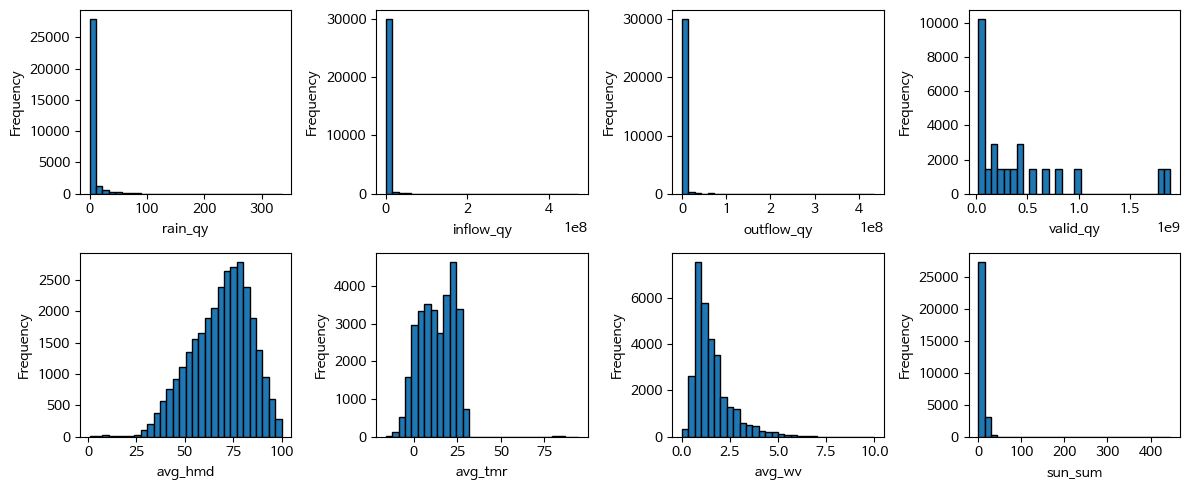

In [ ]:
variables = ['rain_qy', 'inflow_qy', 'outflow_qy', 'valid_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum']

### 변수별 히스토그램 시각화
plt.figure(figsize = (12, 5))  # 그래프 크기 설정

for i, var in enumerate(variables):
  plt.subplot(2, 4, i+1)
  plt.hist(data[var], bins = 30, edgecolor = 'black')
  plt.xlabel(var)
  plt.ylabel('Frequency')

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [ ]:
### 각 변수의 왜도 측정

skewness = data[variables].skew()
print(skewness)

rain_qy        7.235282
inflow_qy     18.328250
outflow_qy    19.274560
valid_qy       1.702923
avg_hmd       -0.480670
avg_tmr        0.150151
avg_wv         1.806641
sun_sum       12.518772
dtype: float64


- 대부분의 변수가 왜곡된 분포를 가지고 있음을 확인할 수 있다.
  - 왜도의 절댓값이 1 이상
- **데이터 변환**과 **데이터 스케일링**을 통해 해당 부분을 완화할 수 있음

### **데이터 변환**
- 데이터 왜곡을 완화하기 위한 데이터 변환 방법으로는 아래 **3가지**가 있음  


**1. 로그 변환 (Log Transformation)**
- 오른쪽으로 긴 꼬리를 가진 분포를 왼쪽으로 단축시킴으로써 왜곡을 완화
- 양수인 데이터에 적용
- ```np.log1p()``` 함수를 사용하여 로그 변환을 적용할 수 있음  
  - 이후 ```np.expm1()```을 사용하여 원래 스케일로 되돌릴 수 있음

**2. 제곱근 변환 (Square Root Transformation)**
- 제곱근을 취함으로써 오른쪽으로 긴 꼬리를 단축시킴으로써 왜곡을 완화
- 주로 카운트 데이터에 적용  

**3. Box-Cox 변환**
- 데이터가 양수인 경우에 적용 가능한 모수화된 변환 방법
- Box-Cox 변환은 데이터의 분포가 가장 정규분포에 가까워지도록 변환
- scipy의 ```stats.boxcox()``` 함수를 사용하여 적용할 수 있음

> 여러 방법들 중 로그 변환을 적용하고자 함

## **2-2. Target 변수 파악하기**

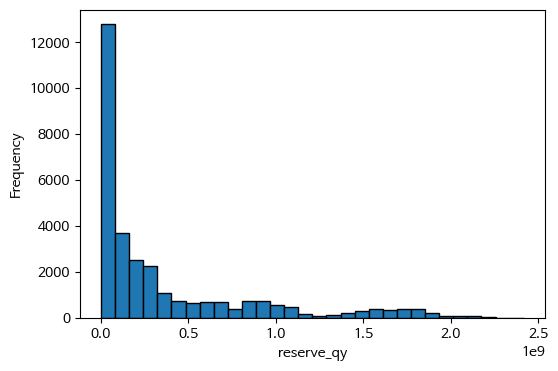

In [ ]:
plt.figure(figsize = (6,4))
plt.hist(data['reserve_qy'], bins = 30, edgecolor = 'black')
plt.xlabel('reserve_qy')
plt.ylabel('Frequency')
plt.show()

- target 변수 또한 왜곡된 분포를 가지고 있음을 확인할 수 있다.
- 데이터 변환을 통해 정규 분포 형태로 값의 분포를 근사시킬 수 있음

In [ ]:
data['reserve_qy'].skew()

1.7732786503431086

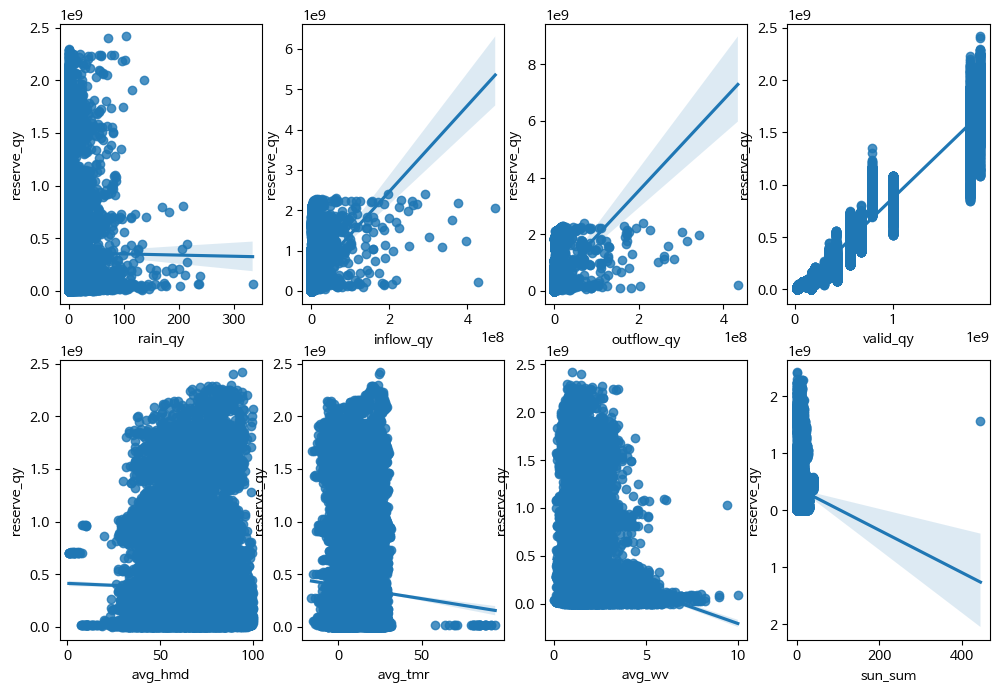

In [ ]:
### 각 feature 변수와 target 변수 간의 관계 시각화

fig, axs = plt.subplots(figsize = (12, 8), ncols = 4, nrows = 2)
features = ['rain_qy','inflow_qy','outflow_qy','valid_qy',
            'avg_hmd','avg_tmr','avg_wv','sun_sum']
for i, ftr in enumerate(features):
  row = int(i/4)
  col = i%4
  sns.regplot(x = ftr, y = 'reserve_qy', data = data, ax = axs[row][col])

- 다른 변수들에 비해 저수량에 영향을 크게 미치는 변수는 valid_qy(유효저수량)이고, inflow_qy(유입량)과 outflow_qy(방류량) 또한 어느 정도 영향력을 보임을 확인할 수 있다.
- 현재 feature 변수들 간 스케일 차이가 있고, target 변수 또한 왜곡된 분포를 가지고 있기에 정확한 결과라고 보기엔 어렵다.

# **3. 추가적인 전처리 수행**
- 다음 순서에 따라 **6가지** 방법으로 데이터 전처리를 수행  
1) X,y 분리 / train_test_split   
2) 이상치 제거(O, X)  
3) 데이터 변환 -> 로그 변환 수행  
4) 데이터 스케일링(표준화, 정규화, 표준정규화)



- 데이터 정리

|데이터|이상치 제거|데이터 변환|데이터 스케일링|
|-----|---|---|-----|
|df1|X|O|표준화|
|df2|O|O|표준화|
|df3|X|O|정규화|
|df4|O|O|정규화|
|df5|X|O|표준정규화|
|df6|O|O|표준정규화|

In [ ]:
### 원본 데이터 복사
# 이후 다양한 방법으로 데이터를 전처리하기 위함

df1 = data.copy()

## **3-1. 학습용, 평가용 데이터 분리**

In [ ]:
# 모두 동일한 데이터로 분할 -> train/test set은 동일하게 유지하기 위함

from sklearn.model_selection import train_test_split

df1_train, df1_test = train_test_split(df1, test_size=0.2, random_state=42, shuffle = True)
df2_train, df2_test = df1_train.copy(), df1_test.copy()
df3_train, df3_test = df1_train.copy(), df1_test.copy()
df4_train, df4_test = df1_train.copy(), df1_test.copy()
df5_train, df5_test = df1_train.copy(), df1_test.copy()
df6_train, df6_test = df1_train.copy(), df1_test.copy()

In [ ]:
df1_train.shape, df1_test.shape

((24544, 12), (6137, 12))

## **3-2. 이상치 처리**
- 대부분의 변수들은 변수 특성상 이상치를 가지는 것이 당연하다고 생각됨
- 또한, 지역별(댐별), 연도별로, 월별로 차이가 있을 것이라고 생각함
  - 해당 부분들을 고려하여 ```avg_tmr```, ```sun_sum``` 변수에 대해서만 이상치 처리 진행
  - 이상치 처리는 train 데이터에 대해서만 처리

In [ ]:
### 이상치 탐지 함수

def get_outlier(df = None, dam_name = None, year = None, month = None, column = None, weight = 1.5):
  # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
  df_col = df[column]
  quantile_25 = np.percentile(df_col.values, 25)
  quantile_75 = np.percentile(df_col.values, 75)

  # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight

  # 최대값 보다 크거나, 최소값 보다 작은 값을 이상치로 설정하고 DataFrame index 반환
  outlier_index = df_col[(df_col < lowest_val) | (df_col > highest_val)].index

  # 이상치 정보를 저장할 dictionary 생성
  outlier_info = {
      'dam_nm': dam_name,
      'obsr_de': f'{year}년 {month}월',
      'column': column,
      'outlier_idx': outlier_index
  }

  return outlier_info

In [ ]:
# 댐 이름, 월, 컬럼명을 저장할 리스트 생성
outlier_info_list = []
rows_to_drop = []  # 삭제할 행의 인덱스를 저장할 리스트 생성

cols = ['avg_hmd', 'avg_tmr']
grouped = df2_train.groupby(['dam_nm', df2_train['obsr_de'].dt.year, df2_train['obsr_de'].dt.month])  # 댐별로 + 연도별 + 월별로

for col in cols:
  for (dam, year, month), group_data in grouped:
    outlier_info = get_outlier(group_data, dam_name=dam, year=year, month=month, column=col, weight=1.5)
    if len(outlier_info['outlier_idx']) > 0:
      outlier_info_list.append(outlier_info)
      rows_to_drop.extend(outlier_info['outlier_idx'])  # 삭제할 행의 인덱스 추가

# 이상치 정보 출력
for outlier_info in outlier_info_list:
  dam_name = outlier_info['dam_nm']
  obsr_de = outlier_info['obsr_de']
  col = outlier_info['column']
  outlier_idx = outlier_info['outlier_idx']
  print('댐: {}, 월: {}, 컬럼: {}, 이상치 데이터 인덱스: {}'.format(dam_name, obsr_de, col, outlier_idx))
  print()

In [ ]:
# 이상치가 포함된 행 삭제

df2_train.drop(rows_to_drop, inplace=True)
df4_train.drop(rows_to_drop, inplace=True)
df6_train.drop(rows_to_drop, inplace=True)

In [ ]:
print(len(df2_train), len(df4_train), len(df6_train))

23646 23646 23646


- 기존의 24544개의 데이터에서 23646개의 데이터로 데이터 개수가 감소함

## **3-3. 데이터 변환**
- 각 feature 변수별로 왜도가 1 이상인 변수들에 대해서만 **로그 변환** 수행
  - train, test 데이터 모두에 대해 수행
- target 변수 또한 로그 변환 수행
  - train 데이터에 대해서만 수행

In [ ]:
### 로그 변환

def log_transform(data, variables):
  # feature 변수 처리
  skewed_variables = data[variables].skew()
  skewed_variables = skewed_variables[skewed_variables >= 1].index.tolist()
  for variable in skewed_variables:
    data[variable] = np.log1p(data[variable])

  return data

In [ ]:
vars = ['rain_qy', 'inflow_qy', 'outflow_qy', 'valid_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum']

dfs_train = [df1_train,df2_train, df3_train, df4_train, df5_train, df6_train]
dfs_test = [df1_test, df2_test, df3_test, df4_test, df5_test, df6_test]

for train in dfs_train:
  log_transform(train, vars)
for test in dfs_test:
  log_transform(test, vars)

for train in dfs_train:
  train['reserve_qy'] = np.log1p(train['reserve_qy'])

In [ ]:
df1_train.head(3)

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
10133,보현산,2020-04-29,0.0,9.521656,10.282068,15.975841,39.2,16.699193,41.5,16.4,0.955511,2.580217
10166,보현산,2020-06-01,0.0,7.167809,10.325489,15.883006,35.8,16.699193,48.0,22.6,1.193922,2.240710
29020,합천,2020-01-14,0.0,13.713155,12.051864,20.387157,90.5,20.143447,63.1,0.7,0.470004,1.667707


In [ ]:
df1_test.head(3)

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
25822,주암(조),2019-03-14,0.000000,13.004771,13.359947,1.837610e+08,73.5,19.162618,56.2,4.3,0.916291,3.039749
25940,주암(조),2019-07-10,3.286179,13.828041,13.554031,1.728640e+08,69.2,19.162618,98.1,19.9,0.788457,1.803359
15964,소양강,2020-04-16,0.000000,14.923918,14.767974,1.528286e+09,52.7,21.365120,45.3,15.2,1.193922,2.476538


- 데이터가 제대로 변환된 것을 확인할 수 있다.

## **3-4. 데이터 스케일링**

- 다음과 같이 전처리를 수행 후 각각의 데이터를 csv 파일로 저장
  - train.csv, test.csv
-  
  
|데이터|데이터 스케일링|
|-----|-----|
|df1|표준화(StandardScaler)|
|df2|표준화(StandardScaler)|
|df3|정규화(MinMaxScaler)|
|df4|정규화(MinMaxScaler)|
|df5|표준정규화(RobustScaler)|
|df6|표준정규화(RobustScaler)|

In [ ]:
 # 파일 저장 경로 지정
 save_path = '/content/drive/MyDrive/2023년 K-water 대국민 물 빅데이터 분석과제 공모전/regression/수빈/data'

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

### 데이터 전처리 함수
def data_preprocessing(df_train, df_test, scaler_type, df_num):
  # feature, target 분리
  X_train = df_train.drop(['dam_nm', 'obsr_de', 'reserve_qy', 'reserve_rt'], axis=1) # 필요한 변수만을 선택
  y_train = df_train['reserve_qy']

  X_test = df_test.drop(['dam_nm', 'obsr_de', 'reserve_qy', 'reserve_rt'], axis=1) # 필요한 변수만을 선택
  y_test = df_test['reserve_qy']

  # 스케일러를 선택하여 feature 데이터를 전처리
  if scaler_type == 'StandardScaler':
    scaler = StandardScaler()
  elif scaler_type == 'MinMaxScaler':
    scaler = MinMaxScaler()
  elif scaler_type == 'RobustScaler':
    scaler = RobustScaler()
  else:
    raise ValueError("유효하지 않은 scaler_type입니다. 'StandardScaler', 'MinMaxScaler', 'RobustScaler' 중 하나를 선택해주세요.")

  # feature 데이터만 전처리를 수행하고, 결과를 DataFrame에 저장
  scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
  scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

  # feature 데이터와 target 데이터를 다시 결합하여 DataFrame으로 만듦
  df_train = pd.concat([scaled_X_train.reset_index(drop = True), y_train.reset_index(drop = True)], axis = 1)
  df_test = pd.concat([scaled_X_test.reset_index(drop = True), y_test.reset_index(drop = True)], axis = 1)

  # 전처리된 데이터를 CSV 파일로 저장
  df_train.to_csv(os.path.join(save_path, f'df{df_num}_train.csv'), index = False)
  df_test.to_csv(os.path.join(save_path, f'df{df_num}_test.csv'), index = False)

In [ ]:
# df1과 df2에 대해서 StandardScaler 적용
data_preprocessing(df1_train,df1_test, scaler_type='StandardScaler', df_num = 1)
data_preprocessing(df2_train, df2_test, scaler_type='StandardScaler', df_num = 2)

# df3와 df4에 대해서 MinMaxScaler 적용
data_preprocessing(df3_train, df3_test, scaler_type='MinMaxScaler', df_num = 3)
data_preprocessing(df4_train, df4_test, scaler_type='MinMaxScaler', df_num = 4)

# df5와 df6에 대해서 RobustScaler 적용
data_preprocessing(df5_train, df5_test, scaler_type='RobustScaler', df_num = 5)
data_preprocessing(df6_train, df5_test, scaler_type='RobustScaler', df_num = 6)

- 파일 확인 결과 모두 제대로 전처리 되었음을 확인할 수 있다.

## **3-4. 변수들 간의 상관도 파악하기**

In [ ]:
### 상관계수 히트맵 시각화 함수
def plot_correlation_heatmap(df, title, ax):
  # 상관계수 계산
  corr = df.corr()

  # 삼각형 마스크 만들기(위 쪽 삼각형에 True, 아래 삼각형에 False)
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  # 하삼각행렬만 시각화(밑에만)
  sns.heatmap(corr,
              cmap='RdYlBu_r',
              annot=True,   # 실제 값을 표시
              mask=mask,    # 표시하지 않을 마스크 부분을 지정
              linewidths=.5,  # 경계면을 실선으로 구분하기
              cbar_kws={"shrink": .5},  # 컬러바 크기 절반으로 줄이기
              vmin=-1, vmax=1,   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
              ax=ax
              )
  ax.set_title(title)

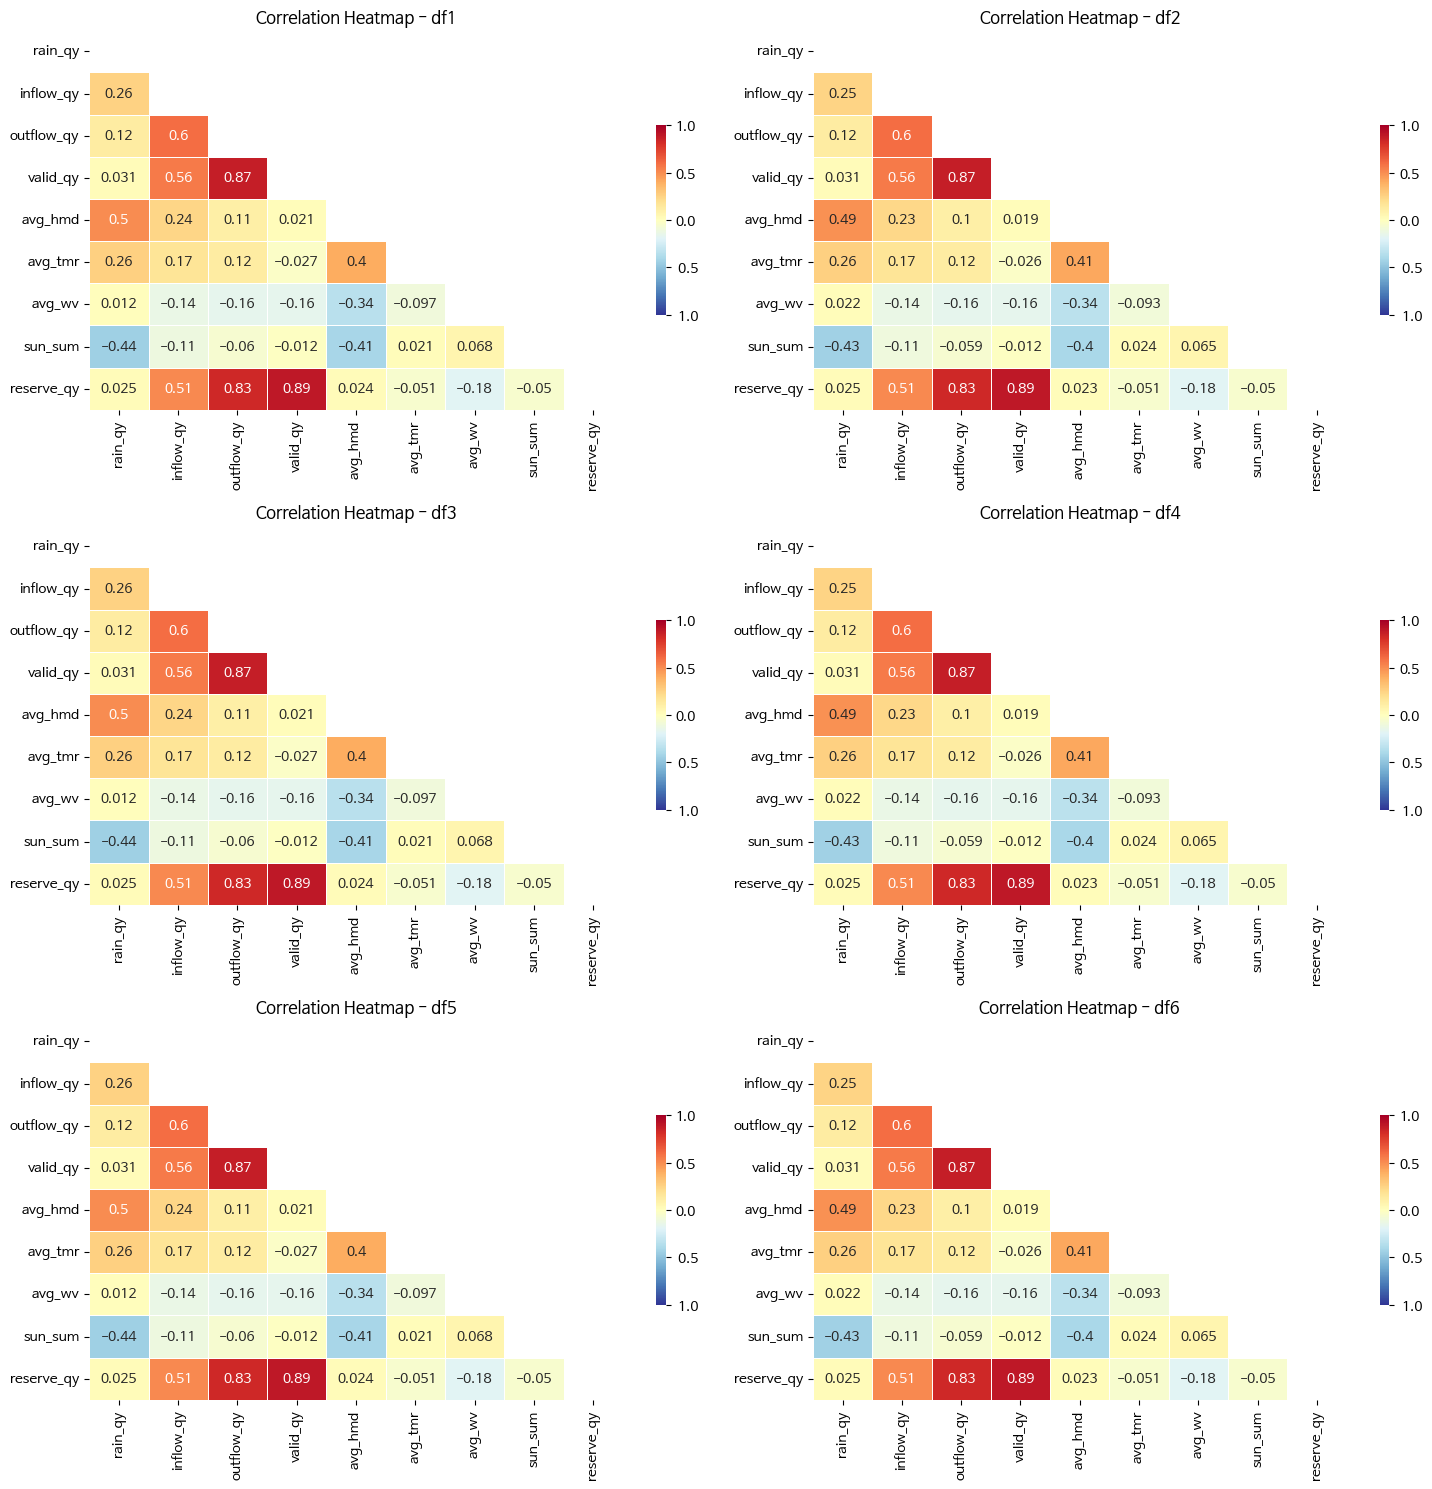

In [ ]:
# 데이터프레임으로 파일 불러오기
train_files = [os.path.join(save_path, f'df{i}_train.csv') for i in range(1, 7)]

# 모든 데이터프레임을 리스트에 저장
dfs_train = [pd.read_csv(file) for file in train_files]

# 3 * 2 그리드로 상관계수 히트맵 시각화
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for i, df in enumerate(dfs_train):
    row = i // 2
    col = i % 2
    title = f'Correlation Heatmap - df{i + 1}'
    plot_correlation_heatmap(df, title, ax=axes[row, col])

plt.tight_layout()
plt.show()

- 변수들 간의 상관계수는 전처리 방법과 상관없이 대부분 비슷한 양상을 보이고 있음
- target 변수인 ```reserve_qy(저수량)```과 상관도가 가장 높은 변수는 ```valid_qy(유효저수량)```이다.
  - 유효저수량보다 저수량이 클 수는 없으니 어찌 보면 당연한 이야기이다.
- feature 변수들 간의 상관도가 지나치게 큰 경우는 그닥 없는 것 같다.
  - ```valid_qy(유효저수량)```와 ```outflow_qy(방류량)```의 상관계수가 높기는 하다.(0.87 정도)
- 현재 문제의 경우 '저수량 예측'이 목적이기에 **예측적** 회귀분석이라고 할 수 있음
  - 예측적 회귀분석의 경우 모델의 예측 성능만 잘 나온다면 굳이 다중공선성 문제를 해결하지 않아도 된다.